In [1]:
# MNISTデータセットを取得
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist
# DESCR データセットの説明
# data インスタンスごとに１行、特徴量毎に１列の配列
# target ラベルの配列を格納


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
# MNISTデータを分割
X, y = mnist["data"],mnist["target"]
# Xに訓練データをyにラベルデータを格納

In [3]:
X.shape
# 70000行で特徴量784の行列(28x28=784)

(70000, 784)

In [4]:
y.shape
# 70000行のラベルデータ

(70000,)

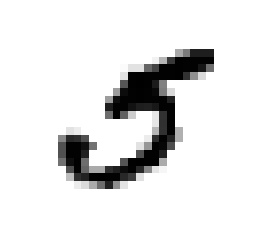

In [5]:
# サンプルデータの抽出
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000] #36000個目のデータを抽出
some_digit_image = some_digit.reshape(28,28) # 28x28の配列に変換

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
# cm.binary 色指定
# interpolation = "nearest" 描画をタイル状に表示
plt.axis("off") 
# 28x28 のグラフ上に表示するかを設定 offはイメージだけ表示
plt.show()

In [6]:
y[36000]
# 36000行目のラベルは何ですか？

5.0

In [7]:
# MNISTのデータを訓練用と検証用に分割。ラベルデータもあるので訓練データに対応する形で分割
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# X_train : 1～60000の訓練用データ
# X_test : 60000～LASTまでの検証用データ 
# y_train : 1～60000のラベルデータ X_trainと対応する
# y_test : 60000～LASTまでの検証用データ X_testと対応する


In [8]:
# 訓練データとそのラベルをシャッフル
import numpy as np
shuffle_index = np.random.permutation(60000)
# shuffle_index に 60000のintを渡している = 0～60000データ分のランダム値を作成
# つまり　permutation(5) = permutation(list(range(5)))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # 60000行分のランダム値でシャッフル


In [9]:
# 二項分類機の訓練
# 1個の数字だけを分類する機能を実装してみる
# 5に対してみはtrue,それ以外はfalse

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
# SGD 確率的勾配降下法
# オンライン学習に向いている
# 非常に大きなデータも扱える
# SGDは訓練の無作為性に依存するため結果際限のためにはrandom_stateパラメータの設定が必要
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)  # 訓練の特徴量データにX_trainの60000件、ラベルデータにy_train_5　という5にだけ true が入ったデータ

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=-inf, verbose=0, warm_start=False)

In [11]:
# 
sgd_clf.predict([some_digit]) # 36000個めのデータを例に分類ができているか確認


array([ True])

In [12]:
# クロスバリデーションで精度を確認
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# cross_val_score(分類機、訓練データ、ラベルデータ、kfoldの数、精度の出し方)
# 上記一つでモデル精度を出すことができる

array([0.91715, 0.95595, 0.9085 ])

In [13]:
# すべての画像を「5以外」クラスに分類する分類機
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
# 精度がとても高いが、入力画像X_trainの10%が5以外なので　「いつも5以外」と予測しているに過ぎない
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91005, 0.90855, 0.91035])

In [15]:
# 混同行列による評価　の前準備
# cross_val_predict関数を使う。評価スコアではなく個々のテストフォールドに対する予測結果を返す
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
# 混同行列
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred) # ラベルデータと予測のデータを設定
# 行：実際のクラス
# 列：予測したクラス
## 混同行列の図は当gitの配下に格納しています。「混同行列.png」
# 以下は5以外を分類するモデル
# 正しく５以外と分類されたもの　間違って5と分類されているもの 
# 間違って5以外と分類されているもの 正しく5と分類されているもの

array([[50816,  3763],
       [  605,  4816]], dtype=int64)

In [18]:
# 適合率と再現率とF値（調和平均)
# 適合率と再現率はトレードオフになる。
# 適合率：病気と予測された人のうち、本当に病気だった人の率
# 再現率：病気の人のうち、本当に病気と判定された率
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # 適合率


0.5613707891362629

In [19]:
recall_score(y_train_5, y_train_pred)    # 再現率

0.88839697472791

In [20]:
from sklearn.metrics import f1_score    # F値
f1_score(y_train_5, y_train_pred)

0.6880000000000001

In [21]:
# 適合率と再現率のトレードオフを見るのに、予測閾値を調整してみる
y_scores = sgd_clf.decision_function([some_digit])
y_scores
# 現在の閾値を出力

array([59972.73916291])

In [22]:
threshold = 0
# ↑により閾値を0 つまり、メソッドを同じ結果にしてみる
y_some_digit_pred = (y_scores > threshold)

In [23]:
y_some_digit_pred
# メソッドと同じ結果なので当然 trueが返る

array([ True])

In [24]:
# 閾値を200000に変えてみる。
# 今度は false が返る
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [25]:
# cross_val_predict() を使い、予測結果ではなく予測閾値をy_scrossにいれる
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [26]:
# y_scross をもとに全ての閾値の適合率と再現率を計算する
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

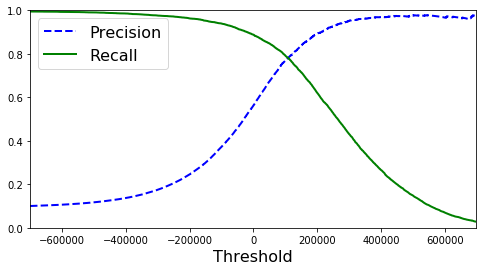

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.savefig("precision_recall_vs_threshold_plot")
plt.show()

In [29]:
# 適合率が90% になるようにモデルを調整してみる
(y_train_pred == (y_scores > 0)).all()

True

In [34]:
# 上記のグラフでは閾値200000位が適合率90%になっている
y_train_pred_90 = (y_scores > 200000)

In [35]:
# 適合率を確認してみる　高い数値が閾値を調整したので出る
precision_score(y_train_5, y_train_pred_90)

0.8936339522546419

In [36]:
# 再現率を確認してみる　低くなってしまっている
recall_score(y_train_5, y_train_pred_90)

0.6214720531267294

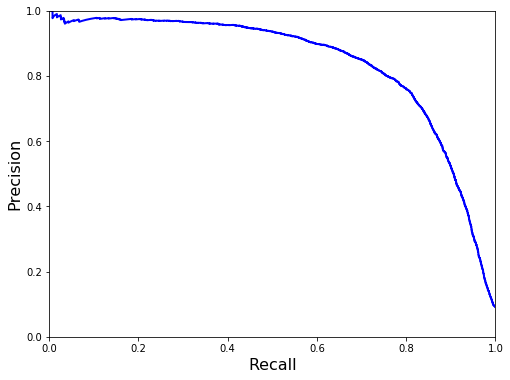

In [33]:
# 適合率を再現率をプロットしてみる
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.savefig("precision_vs_recall_plot")
plt.show()